In [1]:
import time
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from utils.voca_model import VOCAModel
from run_training import get_train_elements, train_model

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Usando {}'.format(device))

Usando cuda


In [3]:
config, data_handler, batcher = get_train_elements()

Checkpoint dir already exists ./training
Use existing config ./training/config.pkl
Loading data
Loading face vertices
Loading templates
Loading raw audio
Process audio
Loading index maps
Initialize data splits
Initialize training, validation, and test indices
sequence data missing FaceTalk_170811_03274_TA - sentence01
sequence data missing FaceTalk_170811_03274_TA - sentence02
sequence data missing FaceTalk_170811_03274_TA - sentence24
sequence data missing FaceTalk_170913_03279_TA - sentence12
sequence data missing FaceTalk_170913_03279_TA - sentence38
sequence data missing FaceTalk_170912_03278_TA - sentence11
sequence data missing FaceTalk_170809_00138_TA - sentence32


In [4]:
model = VOCAModel(config=config)

In [5]:
epoch_num = 4
result = train_model(config, batcher, model, device, epoch_num, debug_batches=True, debug_time=True)

Processing training batches, total: 1307
Processing batch 262/1307...
Processing batch 523/1307...
Processing batch 785/1307...
Processing batch 1046/1307...
Processing batch 1307/1307...
Processing validation batches, total: 153
Processing batch 31/153...
Processing batch 62/153...
Processing batch 92/153...
Processing batch 123/153...
Processing batch 153/153...
Época (1/4): train_loss = 0.088210, val_loss= 0.08712166
epoch 1/4 took 12.85360716978709 minutes
Processing training batches, total: 1307
Processing batch 262/1307...
Processing batch 523/1307...
Processing batch 785/1307...
Processing batch 1046/1307...
Processing batch 1307/1307...
Processing validation batches, total: 153
Processing batch 31/153...
Processing batch 62/153...
Processing batch 92/153...
Processing batch 123/153...
Processing batch 153/153...
Época (2/4): train_loss = 0.088211, val_loss= 0.08777258
epoch 2/4 took 9.29835902452469 minutes
Processing training batches, total: 1307
Processing batch 262/1307...
P

In [6]:
def plot_loss(model_dic, model_name=None):
    train_loss_history = model_dic['train_loss_history']
    val_loss_history = model_dic['val_loss_history']
    x_values = range(1, len(train_loss_history) + 1)
    plt.figure(figsize=(7, 5))
    if model_name is None:
        plt.title('Loss')
    else:
        plt.title(model_name + ' Loss')
    plt.plot(x_values, train_loss_history, '-o', label='train')
    plt.plot(x_values, val_loss_history, '-o', label='val')
    plt.ylabel('Loss')  
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.show()

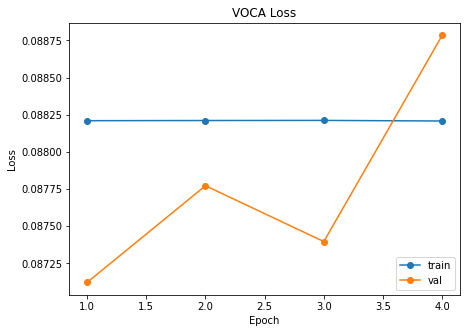

In [7]:
plot_loss(result, 'VOCA')